<a href="https://colab.research.google.com/github/Mmmmari/Wotech-Team-2.3/blob/main/WoTech_Python_Lesson18_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd

titanic_data = sns.load_dataset('titanic')
titanic_data.head()

titanic_data.shape

(891, 15)

## Data Investigation

In [2]:
# Check how many empty values there are
titanic_data.isnull().sum()

# Drop 'deck' column as there are mostly null values
titanic_data.drop('deck', axis=1, inplace=True)

# Check data types
titanic_data.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


## Data Transformation

In [3]:
titanic_data.drop(['alive', 'alone', 'adult_male', 'pclass'], axis=1, inplace=True) #a lot of empty values
titanic_data['class'] = titanic_data['class'].astype(str) #modified the object from category to str
titanic_data.fillna(0, inplace=True) #replaces empty with null
titanic_data.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,embark_town
0,0,male,22.0,1,0,7.2500,S,Third,man,Southampton
1,1,female,38.0,1,0,71.2833,C,First,woman,Cherbourg
2,1,female,26.0,0,0,7.9250,S,Third,woman,Southampton
3,1,female,35.0,1,0,53.1000,S,First,woman,Southampton
4,0,male,35.0,0,0,8.0500,S,Third,man,Southampton


In [4]:
# Column Sex = male/female
sex_mapping = {'male': 0, 'female': 1}
titanic_data['sex'] = titanic_data['sex'].map(sex_mapping)

# Embark town
titanic_data['embark_town'].unique()
embark_town_mapping = {'Southampton': 1, 'Cherbourg': 2, 'Queenstown': 3, 0:0}
titanic_data['embark_town'] = titanic_data['embark_town'].map(embark_town_mapping)

# Embarked
titanic_data['embarked'].unique()
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3, 0:0}
titanic_data['embarked'] = titanic_data['embarked'].map(embarked_mapping)

# Who
titanic_data['who'].unique()
who_mapping = {'man': 1, 'woman': 2, 'child': 3, 0:0}
titanic_data['who'] = titanic_data['who'].map(who_mapping)

titanic_data.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,embark_town
0,0,0,22.0,1,0,7.2500,1,Third,1,1
1,1,1,38.0,1,0,71.2833,2,First,2,2
2,1,1,26.0,0,0,7.9250,1,Third,2,1
3,1,1,35.0,1,0,53.1000,1,First,2,1
4,0,0,35.0,0,0,8.0500,1,Third,1,1


In [5]:
titanic_data.drop('class', axis=1, inplace=True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    int64  
 2   age          891 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embarked     891 non-null    int64  
 7   who          891 non-null    int64  
 8   embark_town  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


## Data Modelling

In [6]:
# Trying to predict who would survive in Titanic Disaster

from sklearn.model_selection import train_test_split

X = titanic_data.drop('survived', axis=1) # Features axis
y = titanic_data['survived'] # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

## Logic Regression
### Import, Initialize, Train

In [7]:
from sklearn.linear_model import LogisticRegression #import
model = LogisticRegression() #initialize
model.fit(X_train, y_train) #train/fit

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
pred_results = model.predict(X_test)
pred_results

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

# TEAMWORK

## Decision Tree Classifier

In [9]:
from sklearn import tree # import
model_tree = tree.DecisionTreeClassifier() # initialize
model_tree.fit(X_train, y_train) #fit

DecisionTreeClassifier()

In [10]:
model_tree.predict(X_test) # predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

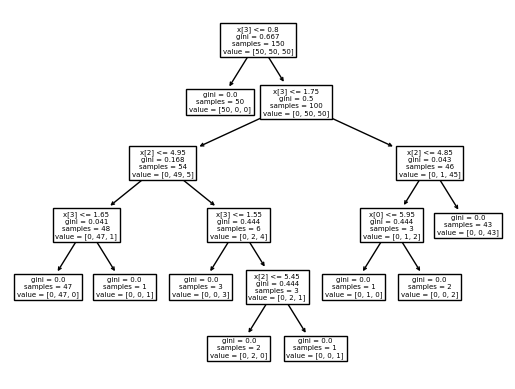

In [14]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X_train, y_train = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)


## Cross-validation

In [23]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
for train, test in k_fold.split(X_train):
    print("%s %s" % (train, test))
accuracy_scores = cross_val_score(model_tree, X, y, cv=k_fold, scoring='accuracy')
print(f'The accuracy scores are {accuracy_scores}')


[  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  20  21
  22  23  24  25  26  27  28  29  30  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  65  66  67  69  70  71  72  74  75  77  79  80  81  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 142 143 144 145 146 147 148 149] [  9  12  18  19  31  36  64  68  73  76  78  82 110 118 141]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  57  58  59
  60  61  62  63  64  65  66  67  68  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102